In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [3]:
env = gym.make('Pendulum-v0')
learner = rltrain.DDPG(env, gamma=0.9, net_args={'hidden_dims': [16]}, lr=1e-2)
learner.show_loss_every = 1000
learner.minibatch_size = 256
learner.minimum_transitions_in_replay = 1000
viz = helpers.PendulumViz(learner)

Actor (mu): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): Tanh()
  )
)
Critic (Q): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


Replay Buffer has 400 transitions


/Users/leodirac/dev/ddpg/rldqn.py:151: UserWarning: calc_qval_batch can usually be replaced with just forward()
  warnings.warn("calc_qval_batch can usually be replaced with just forward()")


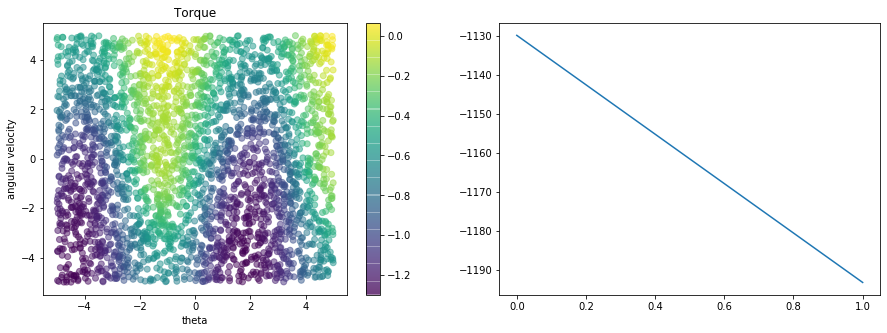

Replay Buffer has 1400 transitions


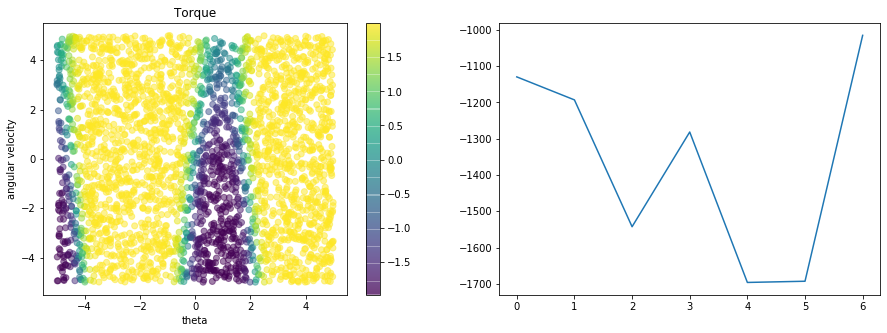

Critic Loss = 0.05893.  Mu loss = 10.35156
Replay Buffer has 2400 transitions


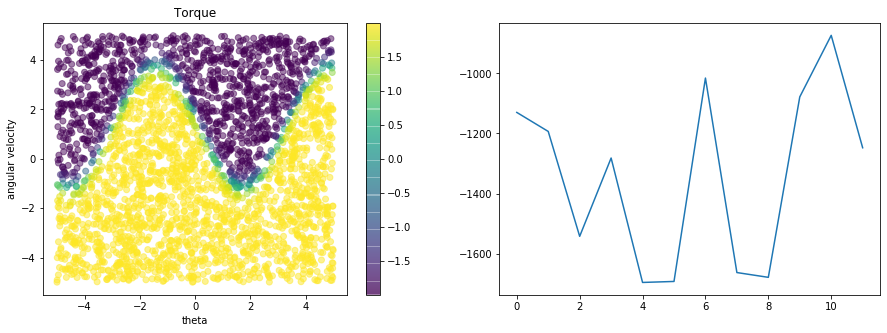

Critic Loss = 0.07827.  Mu loss = 14.90199
Replay Buffer has 3400 transitions


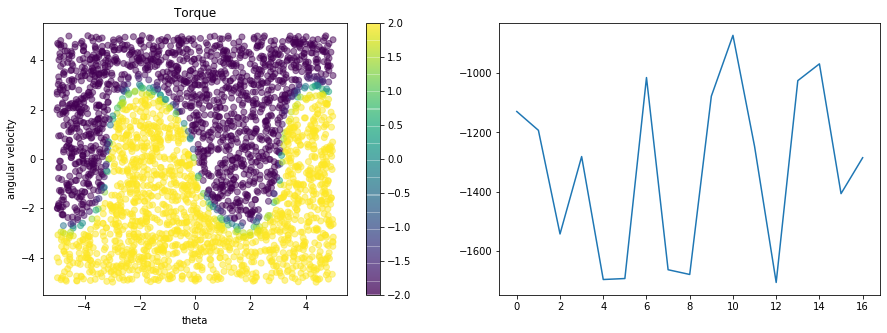

In [4]:
learner.eps = 1
for i in tqdm(range(20), "random warmup"):
    learner.rollout()
    if i % 5 == 1:
        print(f"Replay Buffer has {len(learner._replay)} transitions")
        viz.plot_q()



Eps = 0.93 on 1 of 5


Critic Loss = 0.06307.  Mu loss = 21.27568
Critic Loss = 0.14140.  Mu loss = 24.24262



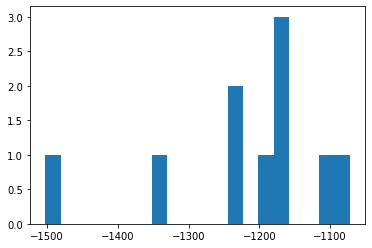

Reward mean,std = -1218.000 +/- 117.883


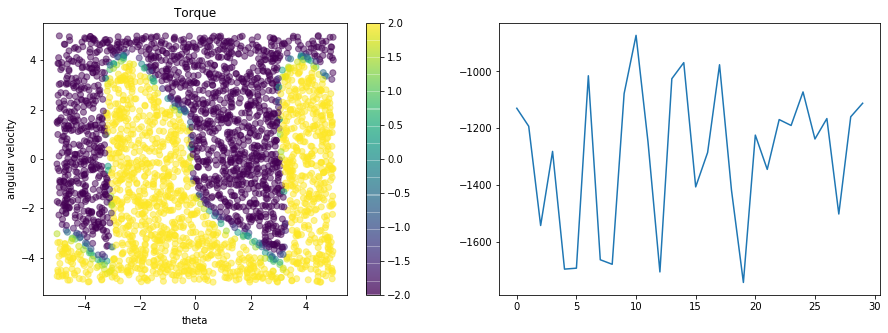



Eps = 0.71 on 2 of 5


Critic Loss = 0.31887.  Mu loss = 27.10305
Critic Loss = 0.08879.  Mu loss = 28.36703



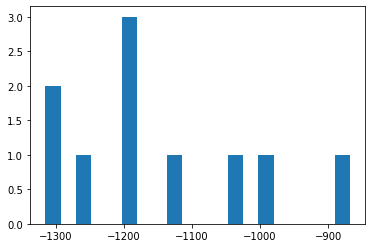

Reward mean,std = -1147.013 +/- 137.739


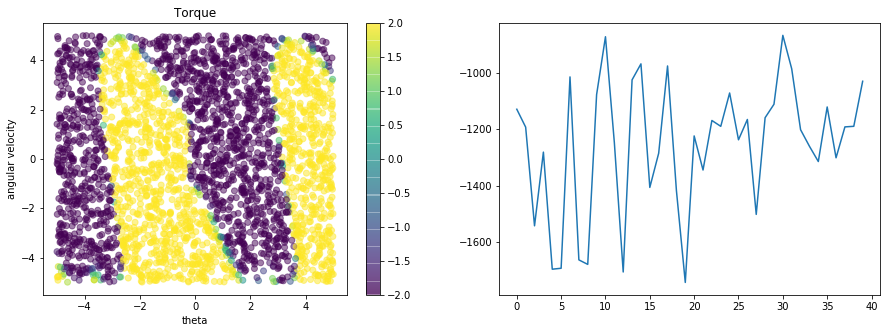



Eps = 0.49 on 3 of 5


Critic Loss = 0.43138.  Mu loss = 34.34552
Critic Loss = 0.31897.  Mu loss = 35.34725



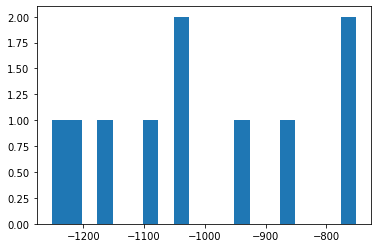

Reward mean,std = -1012.894 +/- 166.992


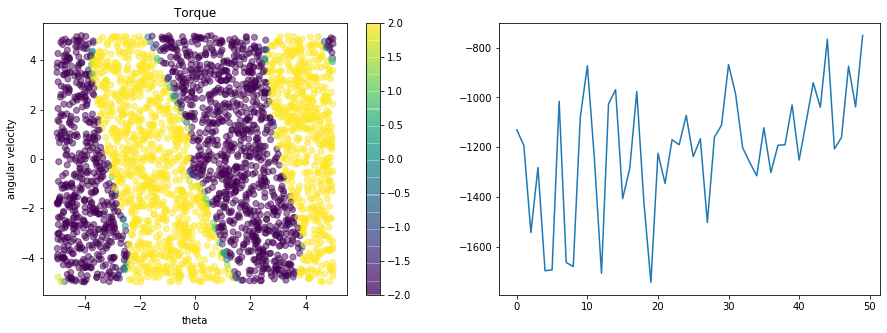



Eps = 0.27 on 4 of 5


Critic Loss = 0.32741.  Mu loss = 36.19533
Critic Loss = 0.17629.  Mu loss = 38.28021



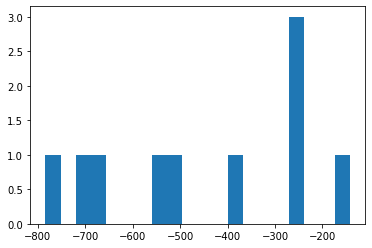

Reward mean,std = -454.584 +/- 210.075


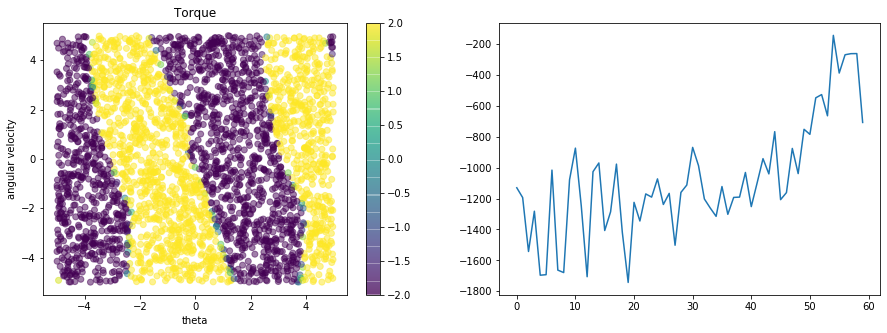



Eps = 0.04 on 5 of 5


Critic Loss = 0.32669.  Mu loss = 36.48133
Critic Loss = 0.21928.  Mu loss = 34.23797



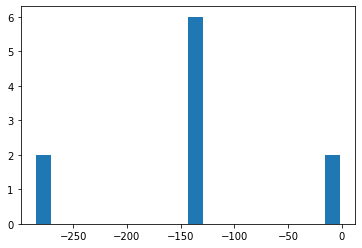

Reward mean,std = -137.948 +/- 87.470


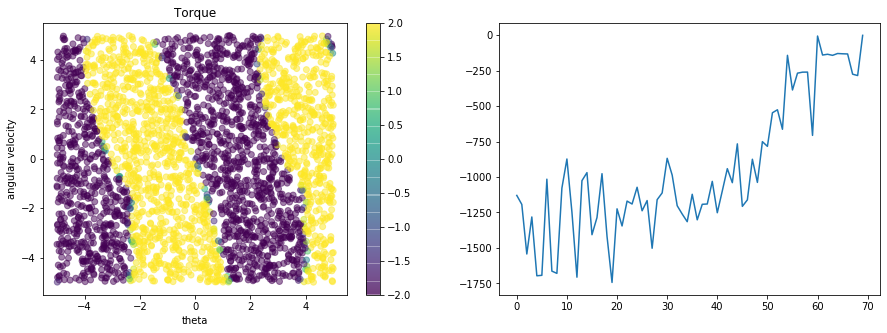

In [5]:
N = 5
for d in range(N):
    eps = 1.0 - (d+0.3)/(N-0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps, n=10)
    viz.plot_q()

Critic Loss = 0.54353.  Mu loss = 35.09671
Critic Loss = 0.88821.  Mu loss = 36.83904



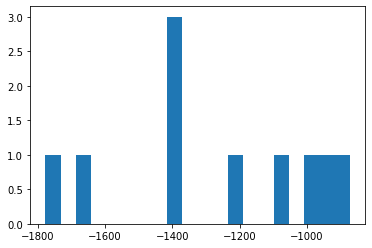

Reward mean,std = -1271.748 +/- 290.268


In [6]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=10)

Critic Loss = 0.23972.  Mu loss = 37.39827
Critic Loss = 0.44913.  Mu loss = 36.90841
Critic Loss = 0.18720.  Mu loss = 34.35973
Critic Loss = 0.22513.  Mu loss = 34.34074



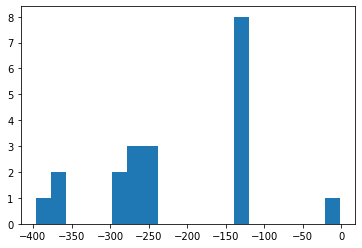

Reward mean,std = -214.874 +/- 99.817


In [7]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=20)

In [8]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%   975.99ms/cyc @     1.0 calls/cyc
              do_learning:  94.3%   920.26ms/cyc @   199.0 calls/cyc
                   sample:  29.5%   288.21ms/cyc @   189.1 calls/cyc
            critic_update:  27.2%   265.92ms/cyc @   189.1 calls/cyc
             actor_update:  18.1%   176.54ms/cyc @   189.1 calls/cyc
             move_targets:  18.1%   176.40ms/cyc @   189.1 calls/cyc


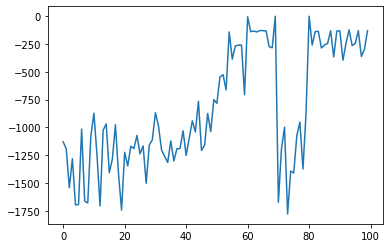

In [9]:
plt.plot(learner.reward_history)

In [10]:
learner.eps=0.0
learner.rollout(render=True)

Critic Loss = 0.55407.  Mu loss = 36.63005


(199, -134.52547496126303)

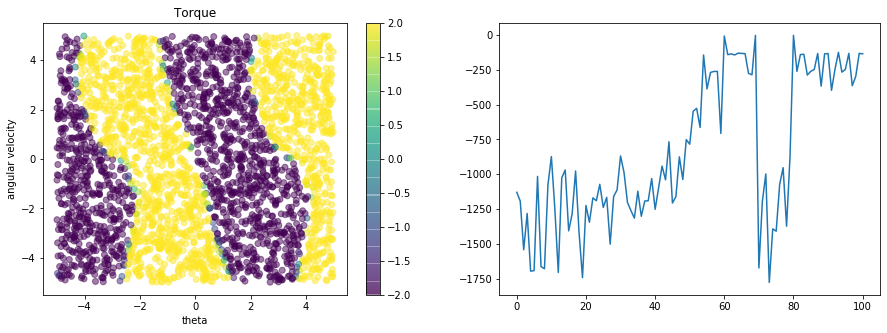

In [11]:
viz.plot_q()